# Nicolas Leguizamon Taller 9. Aprendizaje profundo con TensorFlow 

Hasya ahora, se ha venido utilizando numpy para construir las redes neuronales profundas. Ahora va a utilizar un paquete especialmente diseñado para implementar las funciones que ha venido implementando paso a paso, bajo un marco de **deep learning** que le permite construir redes nueronales más fácilmente. Hay distintos ejemplos de paquetes abiertos que pueden ser utilizados para el aprendizaje computacional, como por ejemplo TensorFlow, PaddlePaddle, Torch, Caffe, Keras, entre otros, que pueden ser utilizados para su desarrollo de sus proyectos en aprendizaje computacional. Estas bibliotecas pueden acortar los tiempos de desarrollo y programación, junto con una implementación más eficiente de los distintos algoritmos de optimización). 

Aquí vamos a estudiar la biblioteca TensorFlow: 

- Inicialización de parámetros
- Empezar la sesión
- Entrenar algoritmos 
- Implementar una red neuronal


## 1 - Explorando la biblioteca Tensorflow 

Ejecutando la siguiente celda puede importar la biblioteca:


In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)

C:\Users\Nicolas L\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import tensorflow as tf
hello = tf.constant('Hola, soy una constante que has definido el ambiente TensorFlow!')
sess = tf.Session()
print(sess.run(hello).decode())

Hola, soy una constante que has definido el ambiente TensorFlow!



Primero hagamos un recorrido por la biblioteca. Por ejemplo, calculemos la pérdida sobre un ejemplo/patrón dado (36,39).  
$$pérdida = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1}$$



In [3]:
y_est = tf.constant(36, name='y_est')            # Define una constante y_est = 36.
y = tf.constant(39, name='y')                    # Define y = 39

loss = tf.Variable((y - y_est)**2)               # Crea una variable para la pérdida = loss

init = tf.global_variables_initializer()         # Cuando se ejecute init (en session.run(init)), la variable loss será incializada
                                                 # y lista a ser computada
with tf.Session() as session:                    # Crea una sesión e imprime la salida
    session.run(init)                            # Inicializa la variables
    print('La pérdida es de:',session.run(loss)) # Imprime la pérdida = 3^2

La pérdida es de: 9


Los pasos que hay que seguir para programar en TensorFlow:

1. Crear **tensores** (variables) antes de ejecutarlos. 
2. Programar las operaciones entre los tensores.
3. Incializar los tensores. 
4. Crear una sesión "Session". 
5. Ejecutar la sesión con las operaciones que se deben programar. 

De esta manera, la variable "loss" se definió como una función de otras cantidades, mediante `init=tf.global_variables_initializer()`. Esta función inicializó la variable de pérdida "loss", hasta que finalmente se evalúa y se imprime su valor. 

Ahora, veamos la siguiente celda:

In [6]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a,b)
print(c)

Tensor("Mul_1:0", shape=(), dtype=int32)


¿Esperaba que la respuesta fuera 20? Nótese que lo que se obtuvo fue un tensor diciendo que el resultado es un tensor que no tiene forma (dimensión), y es de tipo "int32". En este sentido, hasta ahora todo lo que ha hecho es definir el ´grafo computacional', pero el comando no se ha ejecutado aún. Para multiplicar los dos números, debe crear la sesión y ejecutarla.

In [5]:
sess = tf.Session()
print(sess.run(c))

20


** Recuerde:**

- Hay que inicializar las variables, crear una sesión y ejecutar las operaciones dentro de la sesión. 

- Paso siguiente, debe declarar unos 'placeholders' (ó handles). Estos placeholders son son objetos cuyo valor sólo puede ser especificado después.  

Para especificar los valores de un placeholder, puede asignarle valores utilizando un diccionario de entrada (variable `feed_dict`). 
        

En la siguiente celda se ha creado un placeholder para x. De esta manera se le puede pasar un valor numérico tras ejecutar la sesión. 

In [7]:
# Cambia el valor de x en el feed_dict

x = tf.placeholder(tf.int64, name = 'x')
print(sess.run(2 * x, feed_dict = {x: 3}))
sess.close()

6


Fíjese que cuando definió por primera vez `x`, no tuvo que especificar su valor. Un placeholder es simplemente una variable a la cual se le va a asignar un valor más adelante, cuando se ejecute la sesión. De este modo, al ejecutar la sesión es que se le pasa su valor. 

Lo que está pasando, cuando se especifican las operaciones requeridas para la computación, se le está diciendo a TensorFlow cómo contruir el grafo computacional. Este grafo va a tener algunos placeholders a los que se les asignará un valor después. Cuando se ejecute la sesión, se le está diciendo a TensorFlow que ejecute el grafo computacional.

### 1.1 - Función lineal

Este primer ejercicio consiste en computar la siguiente ecuación: $Y = WX + b$, donde $W$ y $X$ son matrices aleatorias y b es un vector aleatorio. 

**Ejercicio**: Compute $WX + b$ donde $W, X$, y $b$ son tomados de una distribución Normal. W es de tamaño (4, 3), X es de (3,1) y b es de (4,1). Por ejemplo, una constante X de dimensiones (3,1) se definiría:
```python
X = tf.constant(np.random.randn(3,1), name = "X")

```
Las siguientes funciones pueden ser de ayuda: 
- tf.matmul(..., ...) para multiplicación entre matrices
- tf.add(..., ...) para suma
- np.random.randn(...) para inicialización aleatoria


In [15]:
# FUNCIÓN A CALIFICAR: linear_function

def linear_function():
    """
    Implementa una función lineal: 
            Inicializa W como un tensor aleatorio de tamaño (4,3)
            Inicializa X como un tensor aleatorio de tamaño (3,1)
            Inicializa b como un tensor aleatorio de tamaño (4,1)
    Output: 
    result: ejecuta la sesión para Y = WX + b 
    """
    
    np.random.seed(1)
    
    ### EMPIEZE EL CÓDIGO AQUÍ ###  (≈ 4 líneas de código)
    X = tf.constant(np.random.randn(3, 1), name="X")
    W = tf.constant(np.random.randn(4, 3), name="W")
    b = tf.constant(np.random.randn(4, 1), name="b")
    Y = tf.add(tf.matmul(W, X), b)
    ### TERMINE EL CÓDIGO AQUÍ ###
    
    # Empieze la sesión usando tf.Session() y ejecútela con sess.run(...) sobre la variable que quiera calcular
    
    ### EMPIEZE EL CÓDIGO AQUÍ ### 
    sess = tf.Session()
    result = sess.run(Y)
    ### TERMINE EL CÓDIGO AQUÍ ###
    
    # Cierre la sesión
    sess.close()

    return result

In [16]:
print( "resultado = " + str(linear_function()))

resultado = [[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


**Salida esperada**:

<table> 
<tr> 
<td>
**resultado**
</td>
<td>
[[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]
</td>
</tr> 

</table> 

### 1.2 - Computación del sigmoide 
Acaba de implementar una función lineal. Tensorflow ofrece una variedad de funciones que suelen utilizarse con redes neuronales como e.g. `tf.sigmoid` y `tf.softmax`. Para este ejercicio compute el sigmoide de un input. 

Este ejercicio consiste en utilizar una variable placeholder `x`, para que al ejecutar la sesión, utilize el diccionario de entrada para pasar los valores de `z`. Por lo tanto, (i) defina el placeholder `x`, (ii) defina las operaciones requeridas para computar el sigmoide usando `tf.sigmoid`, y finalmente, (iii) ejecute la sesión. 

** Ejercicio **: Implemente la función sigmoide usando las siguientes funciones: 

- `tf.placeholder(tf.float32, name = "...")`
- `tf.sigmoid(...)`
- `sess.run(..., feed_dict = {x: z})`


Nótese que hay dos manera en las que usualmente se empieza y ejecutan las sesiones en tensorflow: 

**Modo 1:**
```python
sess = tf.Session()  # empieza la sesión
result = sess.run(..., feed_dict = {...})
sess.close() # termina la sesión
```
**Modo 2:**
```python
with tf.Session() as sess: 
    result = sess.run(..., feed_dict = {...})
    # se cierra automáticamente
```


In [17]:
# FUNCIÓN A CALIFICAR: sigmoid

def sigmoid(z):
    """
    Calcula el sigmoide de z
    Input:
    z: valor de entrada
    Output:
    results: sigmoide de z
    """
    
    ### EMPIEZE EL CÓDIGO AQUÍ ###  (≈ 4 líneas de código)
    # Crear el placeholder para x. Nombrarlo 'x'.
    x = tf.placeholder(tf.float32, name="x")

    # compute sigmoide(x)
    sigmoid = tf.sigmoid(x)

    # Empiece una sesión, y ejecútela. Utilize el Modo 2 descrito arriba. 
    # Debe utilizar el feed_dict para pasar el valor de z a x. 
    with tf.Session() as sess: 
    # Ejecute la sesión y llame a la salida "result"
        result = sess.run(sigmoid, feed_dict={x: z})
    
    ### TERMINE EL CÓDIGO AQUÍ ###
    
    return result

In [18]:
print ("sigmoide(0) = " + str(sigmoid(0)))
print ("sigmoide(12) = " + str(sigmoid(12)))

sigmoide(0) = 0.5
sigmoide(12) = 0.9999938


**Salida esperada**:

<table> 
<tr> 
<td>
**sigmoide(0)**
</td>
<td>
0.5
</td>
</tr>
<tr> 
<td>
**sigmoide(12)**
</td>
<td>
0.999994
</td>
</tr> 

</table> 

<font color='blue'>
**Lo que debe haber aprendido**:
1. Crear placeholders
2. Especificar el grafo computacional para las operaciones que busca computar
3. Crear una sesión
4. Ejecutar la sesión, usando un diccionario de entrada (feed-dict), y si es necesario especificar los valores de las variables placeholder. 

### 1.3 -  Computar la pérdida

También se puede usar una función ya especificada para computar la pérdida de la red neuronal. De esta manera, en lugar de tener que programar la función de $a^{[2](i)}$ y $y^{(i)}$ para i=1...m: 
$$ J = - \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log a^{ [2] (i)} + (1-y^{(i)})\log (1-a^{ [2] (i)} )\large )\small\tag{2}$$

se puede hacer lo mismo en una línea de código en tensorflow.

**Ejercicio**: Implemente la función de pérdida de entropía cruzada, mediante la función: 


- `tf.nn.sigmoid_cross_entropy_with_logits(logits = ...,  labels = ...)`

Su código debe recibir `z`, computar el sigmoide (para obtener `a`) y luego computar la pérdida de entropía cruzada $J$. Esto se puede hacer llamando a `tf.nn.sigmoid_cross_entropy_with_logits`, el cual computa

$$- \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log \sigma(z^{[2](i)}) + (1-y^{(i)})\log (1-\sigma(z^{[2](i)})\large )\small\tag{2}$$



In [19]:
# FUNCIÓN A CALIFICAR: cost

def cost(logits, labels):
    """
    Computa el coste usando entropía cruzada sigmoide
    Input:
    logits: vector conteniendo z ("logits"), la salida de la última unidad lineal (antes de la activación final sigmoide)
    labels: vector de etiquetas y ("labels", 1 ó 0) 
    Salida:
    cost: ejecuta la sesión del coste (formula (2))
    """
    
    ### EMPIEZE EL CÓDIGO AQUÍ ###  
    
    # Declare los placeholders para "logits" (z) y "labels" (y) (≈ 2 líneas de código)
    z = tf.placeholder(tf.float32, name="z")
    y = tf.placeholder(tf.float32, name="y")
    
    # Use la función de pérdida (≈ 1 línea de código)
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=z, labels=y)
    
    # Empiece la sesión (≈ 1 línea de código). Según el Modo 1.
    sess = tf.Session()
    
    # Ejecute la sesión (≈ 1 línea de código).
    cost = sess.run(cost, feed_dict={z: logits, y: labels})
    
    # Cierre la sesión (≈ 1 línea de código). 
                       # Termine la sesión
    
    ### TERMINE EL CÓDIGO AQUÍ ###
    
    return cost

In [20]:
logits = sigmoid(np.array([0.2,0.4,0.7,0.9]))
cost = cost(logits, np.array([0,0,1,1]))
print ("coste = " + str(cost))

coste = [1.0053872  1.0366408  0.41385433 0.39956617]


**Salida esperada**:

<table> 
    <tr> 
        <td>
            **coste**
        </td>
        <td>
        [ 1.00538719  1.03664088  0.41385433  0.39956614]
        </td>
    </tr>

</table>

### 1.4 - Codificación de etiquetas de unos

Muchas veces en problemas de estimación con aprendizaje computacional o deep learning, puede haber un vector y con valores que vayan de 0 a C-1, donde C es el número de clases. Si C es por ejemplo 3, entonces se puede tener un vector y=(2,1,0,1), donde el primer ejemplo es de la clase 2, el segundo de la 1, el tercero de la 0, y el cuarto de la 1. Esta información se puede codificar de la siguiente manera:

$$ Y = \begin{bmatrix}
    0  & 0  & 1 & 0 \\
    0  & 1 & 0  & 1\\
    1  & 0 & 0 & 0 
\end{bmatrix}\;\;\; $$

A esto se le suele llamar una codificación "one hot", porque en la nueva codificación hay exactamente un elemento de cada vector columna que es positivo (igual a 1) o que está "caliente" (ó "hot"). Para hacer esta conversión en numpy, puede tomar algunas líneas de código. En tensorflow, se puede hacer en una línea: 

- tf.one_hot(labels, depth, axis) 

**Ejercicio:** Implemente la función abajo para tomar un vector de etiquetas y el número total de clases $C$, y devolver la nueva codificación. Para hacerlo utilice `tf.one_hot()`. 

In [21]:
# FUNCIÓN A CALIFICAR: one_hot_matrix

def one_hot_matrix(labels, C):
    """
    Crea una matriz donde la i-ésima fila corresponde con la i-ésima clase de la j-ésima columna (j-ésimo ejemplo de entrenamiento)
    Input:    
    labels: vector con las etiquetas 
    C: número de clases
    Output:
    one_hot: matriz con la codificación one hot
    """
    
    ### EMPIEZE EL CÓDIGO AQUÍ ### 
    
    # Declare una tf.constant igual a C (depth), y nómbrela 'C'. (≈ 1 línea de código)
    C = tf.constant(C, name="C")
    
    # Use tf.one_hot, recuerde especificar el eje ("axis") (≈ 1 línea de código)
    one_hot_matrix = tf.one_hot(labels, C, axis=0)
    
    # Empieze la sesión (≈ 1 línea de código)
    sess =  tf.Session()
    
    # Ejecute la sesión (≈ 1 línea de código)
    one_hot = sess.run(one_hot_matrix)
    
    # Cierre la sesión (≈ 1 línea de código). 
             # Termine la sesión
    
    ### TERMINE EL CÓDIGO AQUÍ ###
    
    return one_hot

In [22]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, C = 4)
print ("one_hot = " + str(one_hot))

one_hot = [[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


**Salida esperada**:

<table> 
    <tr> 
        <td>
            **one_hot**
        </td>
        <td>
        [[ 0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.  0.]]
        </td>
    </tr>

</table>


### 1.5 - Inicialización con ceros y unos

Ahora va a inicializar un vector con ceros y unos. La función que debe utilizar para inicializar con unos es `tf.ones()`. Para inicializar con ceros puede usar tf.zeros(). Estas funciones reciben las dimensiones y devuelven un arreglo de las dimensiones especificadas de unos  o ceros. 

**Ejercicio:** Implemente la función abajo que tome unas dimensiones y devuelva un arreglo con esas dimensiones de unos. Utilice: 
 - tf.ones(shape)


In [24]:
# FUNCIÓN A CALIFICAR: ones

def ones(shape):
    """
    Crea un arreglo de unos de dimensión "shape"
    Input:
    shape: dimensiones del arreglo que se quiere crear
    Output:
    ones: arreglo de unos
    """
    
    ### EMPIEZE EL CÓDIGO AQUÍ ### 
    
    # Crea un tensor de "unos" usando tf.ones(...). (≈ 1 línea de código)
    ones = tf.ones(shape)
    
    # Empieza la sesión (≈ 1 línea de código)
    sess = tf.Session()
    
    # Ejecuta la sesión para computar 'ones' (≈ 1 línea de código)
    ones = sess.run(ones)
    
    # Cierra la sesión (≈ 1 línea de código). 
             # Termine la sesión
    
    ### TERMINE EL CÓDIGO AQUÍ ###
    return ones

In [25]:
print ("unos = " + str(ones([3])))

unos = [1. 1. 1.]


**Salida esperada**:

<table> 
    <tr> 
        <td>
            **unos**
        </td>
        <td>
        [ 1.  1.  1.]
        </td>
    </tr>

</table>

# 2 - Desarrollo de una red neuronal en tensorflow

En esta parte del taller va a construir una red neuronal usando tensorflow. Recuerde que hay dos partes que debe implementar en tensorflow:

- Crear el grafo computacional
- Ejecutar el grafo


### 2.0 - Enunciado del problema: Identificación de signos

El propósito es el de identificar lenguage de signos. En primera instancia, el problema se simplifica para consturir un modelo de red neuronal que facilite la comunicación por signos para cantidades de 0 a 5.

- **Conjunto de entrenamiento**: 1080 imagenes (de 64 x 64 pixeles) de signos representando números de 0 a 5 (180 imagenes por número).
- **Conjunto de prueba**: 120 imagenes (de 64 x 64 pixeles) de signos representando números de 0 a 5 (20 imágenes por número).


Ejecute el siguiente código para cargar el conjunto de datos.

In [27]:
# Carga de datos
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

Explore los ejemplos del conjunto de datos por medio del índice.

Exception ignored in: <bound method BaseSession.__del__ of <tensorflow.python.client.session.Session object at 0x000002AC2D7BFF28>>
Traceback (most recent call last):
  File "C:\Users\Nicolas L\Anaconda3\lib\site-packages\tensorflow\python\client\session.py", line 704, in __del__
    if self._session is not None:
AttributeError: 'Session' object has no attribute '_session'
Exception ignored in: <bound method BaseSession.__del__ of <tensorflow.python.client.session.Session object at 0x000002AC2D728A20>>
Traceback (most recent call last):
  File "C:\Users\Nicolas L\Anaconda3\lib\site-packages\tensorflow\python\client\session.py", line 704, in __del__
    if self._session is not None:
AttributeError: 'Session' object has no attribute '_session'


y = 2


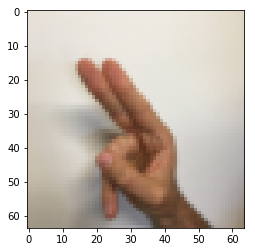

In [28]:
# Ejemplo de una imagen
index = 16
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

Como es usual, se debe aplanar el conjunto de datos, y luego normalizar dividiendo por 255. Además, cada etiqueta se debe re-codificar a un vector one-hot. Ejecute la celda abajo para hacerlo.

In [29]:
# Aplana la imagenes
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T

# Normaliza los datos
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.

# Convierte las etiquetas a matrices one-hot
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

print ("Número de ejemplos de entrenamiento = " + str(X_train.shape[1]))
print ("Número de ejemplos de prueba = " + str(X_test.shape[1]))
print ("Tamaño de X_train: " + str(X_train.shape))
print ("Tamaño de Y_train: " + str(Y_train.shape))
print ("Tamaño de X_test: " + str(X_test.shape))
print ("Tamaño de Y_test: " + str(Y_test.shape))

Número de ejemplos de entrenamiento = 1080
Número de ejemplos de prueba = 120
Tamaño de X_train: (12288, 1080)
Tamaño de Y_train: (6, 1080)
Tamaño de X_test: (12288, 120)
Tamaño de Y_test: (6, 120)


Fíjese que el 12288 obedece a que $64 \times 64 \times 3 = 12288$. Cada imagen es cuadrada, de 64 x 64 pixeles, y el 3 es por los canales RGB. Asegúrese de entender las dimensiones de los datos.

**Objetivo:** 
Construir un modelo que reconozca un signo con buena precisión. Para hacerlo, construya un modelo de tensorflow que va a seguir la misma estructura de los modelos que ya ha implementado antes para el reconocimiento de gatos, pero utilizando una capa de salida softmax. Así puede comparar los resultados obtenidos con numpy y los que va a obtener con tensorflow. 

**Estructura de la red:** 
El modelo de red va a ser *LINEAL -> RELU -> LINEAL -> RELU -> LINEAL -> SOFTMAX*. De esta manera, la capa de salida SIGMOIDE es convertida en una SOFTMAX. La capa SOFTMAX generaliza la SIGMOIDE para cuando hay más de dos clases. 

### 2.1 - Crear placeholders

Primero debe crear los placeholders para `X` e `Y`. Luego podrá pasar los datos de entrenamiento cuando ejecute la sesión.

**Ejercicio:** 
Implemente la función abajo para crear los placeholders en tensorflow.

In [30]:
# FUNCIÓN A CALIFICAR: create_placeholders

def create_placeholders(n_x, n_y):
    """
    Crea los placeholders para la sesión de tensorflow.
    Input:
    n_x: tamaño del vector de imagen (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y: número de clases (de 0 a 5, así que C=6)
    Output:
    X: placeholder para los datos de entrada, de tamaño [n_x, None] y de tipo "float"
    Y: placeholder para las etiquetas, de tamaño [n_y, None] y tipo "float"
    Utiliza None porque permite flexibilidad a la hora de especificar el número de ejmplos para los placeholders.
    """

    ### EMPIEZE EL CÓDIGO AQUÍ ### (≈ 2 líneas de código)
    X = tf.placeholder(dtype=tf.float32, shape=[n_x, None], name="X")
    Y = tf.placeholder(dtype=tf.float32, shape=[n_y, None], name="Y")
    ### TERMINE EL CÓDIGO AQUÍ ###
    
    return X, Y

In [31]:
X, Y = create_placeholders(12288, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("X_8:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Y_2:0", shape=(6, ?), dtype=float32)


**Salida esperada**:

<table> 
    <tr> 
        <td>
            **X**
        </td>
        <td>
        Tensor("Placeholder_1:0", shape=(12288, ?), dtype=float32) (not necessarily Placeholder_1)
        </td>
    </tr>
    <tr> 
        <td>
            **Y**
        </td>
        <td>
        Tensor("Placeholder_2:0", shape=(6, ?), dtype=float32) (not necessarily Placeholder_2)
        </td>
    </tr>

</table>

### 2.2 - Inicialización de los parámetros

La segunda tarea es la de inicializar los parámetros en tensorflow.

**Ejercicio:** 
Implemente la función abajo para inicializar los parámetros en tensorflow. Va a utilizar la inicialización de Xavier para los pesos, y los sesgos se inicializan con ceros. Los tamaños están dados. Por ejemplo, para W1 y b1 puede utilizar: 

```python
W1 = tf.get_variable("W1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
```
Utilize `seed = 1` para replicar los resultados.

In [32]:
# FUNCIÓN A CALIFICAR: initialize_parameters

def initialize_parameters():
    """
    Inicializa los parámetros para construir una red neuronal con tensorflow. 
    Las dimensiones son:
                        W1 : [25, 12288]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [6, 12]
                        b3 : [6, 1]
    Output:
    parameters: diccionario con tensores conteniendo W1, b1, W2, b2, W3, b3
    """
    
    tf.set_random_seed(1)                   # para la replicabilidad
        
    ### EMPIEZE EL CÓDIGO AQUÍ ### (≈ 6 líneas de código)
    W1 = tf.get_variable("W1", [25, 12288], initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1", [25, 1], initializer=tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12, 25], initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2", [12, 1], initializer=tf.zeros_initializer())
    W3 = tf.get_variable("W3", [6, 12], initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable("b3", [6, 1], initializer=tf.zeros_initializer())
    ### TERMINE EL CÓDIGO AQUÍ ###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [33]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


**Salida esperada**:

<table> 
    <tr> 
        <td>
            **W1**
        </td>
        <td>
         < tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref >
        </td>
    </tr>
    <tr> 
        <td>
            **b1**
        </td>
        <td>
        < tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref >
        </td>
    </tr>
    <tr> 
        <td>
            **W2**
        </td>
        <td>
        < tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref >
        </td>
    </tr>
    <tr> 
        <td>
            **b2**
        </td>
        <td>
        < tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref >
        </td>
    </tr>

</table>

### 2.3 - Propagación hacia delante en tensorflow 

Ahora va a implementar la propagación hacia delante en tensorflow. La función toma de entrada un diccionario de parámetros y completa una iteración hacia delante. Utilice las funciones: 

- `tf.add(...,...)` para suma
- `tf.matmul(...,...)` para multiplicación matricial
- `tf.nn.relu(...)` para la activación ReLU

**Problema:** 
Implemente la propagación hacia delante. Puede comparar el código con el equivalente de numpy. Fíjese que la propagación hacia delante en este caso se detiene en `z3`. Esto es porque en tensorflow la capa de salida es dada como input de la función que computa la pérdida. Por lo tanto no se computa `a3`.



In [34]:
# FUNCIÓN A CALIFICAR: forward_propagation

def forward_propagation(X, parameters):
    """
    Implementa la propagación hacia delante para el modelo: LINEAL -> RELU -> LINEAL -> RELU -> LINEAL -> SOFTMAX
    Input:
    X: placeholder para el conjunto de entrada, de tamaño (tamaño de entrada, número de ejemplos)
    parameters: diccionario python con los parámetros "W1", "b1", "W2", "b2", "W3", "b3" con dimensiones dadas en initialize_parameters
    Output:
    Z3: salida de la última unidad LINEAL
    """
    
    # Recupere los parámetros del diccionario "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    ### EMPIEZE EL CÓDIGO AQUÍ ### (≈ 5 líneas de código)             # Equivalentes numpy:
    Z1 =  tf.add(tf.matmul(W1, X), b1)                                # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                               # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                                # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                               # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                                # Z3 = np.dot(W3,Z2) + b3
    ### TERMINE EL CÓDIGO AQUÍ ###
    
    return Z3

In [35]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(6, ?), dtype=float32)


**Salida esperada**: 

<table> 
    <tr> 
        <td>
            **Z3**
        </td>
        <td>
        Tensor("Add_2:0", shape=(6, ?), dtype=float32)
        </td>
    </tr>

</table>

### 2.4 Calcule el coste

Como ya se ha visto, el coste se compute mediante:
```python
tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = ..., labels = ...))
```
**Problema**: 
Implemente la función de coste. 
- Fíjese que las entradas de "`logits`" y "`labels`" para `tf.nn.softmax_cross_entropy_with_logits` deben tener dimensiones (número de ejemplos, número de clases). Por ello se han transpuesto Z3 e Y.
- Además, `tf.reduce_mean` hace la suma sobre todos los ejemplos.

In [37]:
# FUNCIÓN A CALIFICAR: compute_cost 

def compute_cost(Z3, Y):
    """
    Calcula el coste
    Input:
    Z3: salida de la propagación hacia delante (salida de la última unidad lineal), de tamaño (6, número de ejemplos)
    Y: vector placeholder de etiquetas, mismo tamaño que Z3
    Output:
    cost: tensor de la función de coste
    """
    
    # para ajustarse a los requerimientos de la función tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    ### EMPIEZE EL CÓDIGO AQUÍ ### (≈ 1 línea de código)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels= labels))
    ### TERMINE EL CÓDIGO AQUÍ ###
    
    return cost

In [38]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("coste = " + str(cost))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

coste = Tensor("Mean:0", shape=(), dtype=float32)


**Salida esperada**:

<table> 
    <tr> 
        <td>
            **coste**
        </td>
        <td>
        Tensor("Mean:0", shape=(), dtype=float32)
        </td>
    </tr>

</table>

### 2.5 - Retropropagación y actualización de parámetros

1Bajo el ambiente de tensorflow, es mucho más sencillo implementar la retro-propagacion, y la actualización de los parámetros se hace en una linea de código. Tras computar la función de coste, debe crear un objeto "`optimizer`". Este objeto debe ser llamado junto con el coste cuando se ejecute la tf.session. Cuando se le llame, desempeñará la optimizacion sobre el coste con el método seleccionado y la tasa de aprendizaje.

Por ejemplo, para el G.D. el 'optimizer' sería:
```python
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)
```

Para desempeñar la optimización puede hacer:
```python
_ , c = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
```

Esta linea computa la retro-propagación, pasando por el grafo de tensorflow en dirección hacia atrás. 

Fíjese que al codificar, se hace uso de `_` como una variable temporal/auxiliar para almacenar valores que no se van a utilizar después. De este modo, `_` toma la evaluación de `optimizer`, que no va a ser utilizada luego (y `c` toma el valor de la variable `cost`). 

### 2.6 - Construcción del modelo

En la siguiente función se juntan las funciones implementadas previamente, en el orden correcto.


In [72]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.002,
          num_epochs = 1500, minibatch_size = 24, print_cost = True):
    """
    Implementa una red neuronal de tres capas en tensorflow: LINEAL->RELU->LINEAL->RELU->LINEAL->SOFTMAX.
    Input:
    X_train: conjunto de entranamiento, de dimensiones (dimensión de los patrones = 12288, número de ejemplos = 1080)
    Y_train: etiquetas de entrenamiento, de dimensiones (número de clases = 6, número de conjuntos de entrenamiento = 1080)
    X_test: conjunto de prueba, de tamaño (dimensión de los patrones = 12288, número de ejemplos = 120)
    Y_test: etiquetas de prueba, de dimensiones (número de clases = 6, número de ejemplos = 120)
    learning_rate: tasa de aprendizaje de la optimización
    num_epochs: número de épocas para el bucle de optimización
    minibatch_size: tamaño de los lotes o mini-batches de datos para optimizar
    print_cost: si es True muestra el coste cada 100 épocas
    Output:
    parameters: parametros del modelo.
    """
    
    ops.reset_default_graph()                         # para vovler a ajecutar el modelo sin sobre-escribir las variables tf
    tf.set_random_seed(1)                             # para replicabilidad
    seed = 3                                          # para replicabilidad
    (n_x, m) = X_train.shape                          # (n_x: tamaño del input, m : número de ejemplos de entrenamiento)
    n_y = Y_train.shape[0]                            # n_y : tamaño de la salida
    costs = []                                        # Hacerle seguimiento al coste
    
    # Crear los placeholders de dimensiones (n_x, n_y)
    ### EMPIEZE EL CÓDIGO AQUÍ ### (≈ 1 línea de código)
    X, Y = create_placeholders(n_x, n_y)
    ### TERMINE EL CÓDIGO AQUÍ ###

    # Initializar los parametros
    ### EMPIEZE EL CÓDIGO AQUÍ ### (≈ 1 línea de código)
    parameters = initialize_parameters()
    ### TERMINE EL CÓDIGO AQUÍ ###
    
    # Propagación hacia delante: Construye la propagación hacia delante en el grafo de tensorflow
    ### EMPIEZE EL CÓDIGO AQUÍ ### (≈ 1 línea de código)
    Z3 = forward_propagation(X, parameters)
    ### TERMINE EL CÓDIGO AQUÍ ###
    
    # Función de coste: Añade la función de coste al grafo de tensorflow
    ### EMPIEZE EL CÓDIGO AQUÍ ### (≈ 1 línea de código)
    cost = compute_cost(Z3, Y)
    ### TERMINE EL CÓDIGO AQUÍ ###
    
    # Retro-propagación: Define el método de optimización ("optimizer") de tensorflow optimizer. Usar el método de Adam ("AdamOptimizer").
    ### EMPIEZE EL CÓDIGO AQUÍ ### (≈ 1 línea de código)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    ### TERMINE EL CÓDIGO AQUÍ ###
    
    # Inicialización de las variables
    init = tf.global_variables_initializer()

    # Empieza la sesión para computar el grafo computacional en tensorflow
    with tf.Session() as sess:
        
        # Ejecute la incialización
        sess.run(init)
        
        # Bucle de entrenamiento
        for epoch in range(num_epochs):

            epoch_cost = 0.                           # Declara el coste tras cada época
            num_minibatches = int(m / minibatch_size) # Número de lotes de datos de tamaño minibatch_size en entrenamiento
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Selecciona una partición de los datos (mini-batch)
                (minibatch_X, minibatch_Y) = minibatch
                
                # Ejecuta la sesión para ejecutar el grafo (optimizador + coste), y mediante el feedict se pasan los valores de la partición (X,Y).
                ### EMPIEZE EL CÓDIGO AQUÍ ### (≈ 1 línea de código)
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                ### TERMINE EL CÓDIGO AQUÍ ###
                
                epoch_cost += minibatch_cost / num_minibatches

            # Muestra el coste cada 100 épocas
            if print_cost == True and epoch % 100 == 0:
                print ("Coste tras la época %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('Coste')
        plt.xlabel('Épocas')
        plt.title("Tasa de aprendizaje =" + str(learning_rate))
        plt.show()

        # Se guardan los parámetros en una variable
        parameters = sess.run(parameters)
        print ("Los parámetros han sido aprendidos")

        # Predicciones corregidas (el máximo se lo lleva todo)
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Precisión en los datos de prueba
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Precisión de entrenamiento:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Precisión de prueba:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

Ejecute la siguiente celda para entrenar el modelo. Esto puede tomar algunos minutos. Revise que el "Coste tras la época 100" sea de 0.906227. Si no lo es, interrumpa el proceso dándole a stop (⬛), e intente corregir el código. Si es el coste correcto, tómese un café y vuelva en 5 minutos..

Coste tras la época 0: 1.788405
Coste tras la época 100: 0.846758
Coste tras la época 200: 0.390060
Coste tras la época 300: 0.336921
Coste tras la época 400: 0.176128
Coste tras la época 500: 0.118099
Coste tras la época 600: 0.047386
Coste tras la época 700: 0.025934
Coste tras la época 800: 0.016343
Coste tras la época 900: 0.010477
Coste tras la época 1000: 0.008112
Coste tras la época 1100: 0.006435
Coste tras la época 1200: 0.005122
Coste tras la época 1300: 0.004259
Coste tras la época 1400: 0.003684


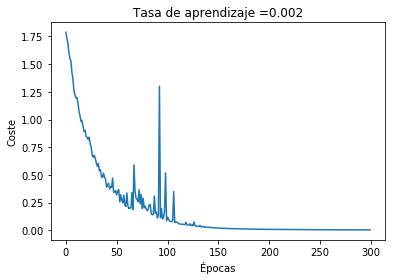

Los parámetros han sido aprendidos
Precisión de entrenamiento: 1.0
Precisión de prueba: 0.875


In [73]:
parameters = model(X_train, Y_train, X_test, Y_test)

**Salida esperada**:

<table> 
    <tr> 
        <td>
            **Precisión de  entrenamiento**
        </td>
        <td>
        0.996
        </td>
    </tr>
    <tr> 
        <td>
            **Precisión de  prueba**
        </td>
        <td>
        0.733
        </td>
    </tr>

</table>



Bajo la especificación de la tasa de aprendizaje (0.001) y el número de épocas (1500), el algoritmo reconoce los signos con un 73.3% de precicisón. 


**Anotaciones**:
- El modelo parece ajustar bien los datos de entrenamiento. Sin embargo, dada la diferencia entre entrenamiento y predicción, podría intentar mejorar los resultados mediante regularización, ó cambiando los hiper-parámetros. 
- Visualize la sesión como un bloque de código para entrenar el modelo. Cada vez que ejecuta la sesión con una partición de datos (mini-batches), se entrenan los parámetros. En total la sesión se ha ejecutado un número grande de veces (1500 épocas) hasta que finalmente se obtienen los parámetros "bien" entrenados.

### 2.7 - Mejore los resultados

Aplicando una técnica de regularización, o alguna otra técnica que usted conozca (también puede probar con cambiar algún hiper-parámetro), intente mejorar los resultados y encuentre un modelo que logre una mayor precisión en prueba. 

Imprima su resultado (precisión de prueba)  y el método que ha utilizado para conseguirlo. Muestre su código a continuación en una nueva celda.


In [ ]:
# Escriba aquí su nuevo código e imprima el porcentaje de precisión logrado


<font color='blue'>
**Recuerde**:
- Tensorflow es una marco de programación muy utilizado en Deep Learning
- Hay dos clases de objetos principales en tensorflow: Tensores y Operadores. 
- Al programar en tensorflow, debe seguir los siguientes pasos:
    - Crear un grafo computacional con los tensores (Variables, Placeholders, ...) y Operaciones (tf.matmul, tf.add, ...)
    - Crear una sesión
    - Inicializar la sesión
    - Ejecutar la sesión para ejecutar el grafo
- Puede ejecutar el grafo múltiples veces como se ha hecho en model()
- La retro-propagación y la optimización se hace automáticamente cuando se ejecuta la sesión sobre el objeto de optimización "optimizer".